In [11]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-10-27 19:43:30,425: Credentials are already in use. The existing account in the session will be replaced.


In [12]:
from qiskit.tools import jupyter
# Initialize job tracker to automatically track all jobs
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [15]:
from qiskit.providers.ibmq import least_busy
provider = IBMQ.get_provider(group='open')
backend = least_busy(provider.backends(filters=lambda
                                      x: x.configuration().n_qubits >= (2) and
                                      not x.configuration().simulator and
                                      x.status().operational==True))
#Create a simple circuit
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
#Execute on backend
job = execute(qc, backend)


In [17]:
least_busy(provider.backends(filters=lambda
                                      x: x.configuration().n_qubits >= (2) and
                                      not x.configuration().simulator and
                                      x.status().operational==True))

<IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>

In [18]:
#Disable the job watcher
%qiskit_disable_job_watcher

In [19]:
#Display the list of all available backends and provide a brief overview of each
%qiskit_backend_overview

In [20]:
#Import the transpiler passess object
from qiskit.transpiler import passes
# List out all the passes available
print(dir(passes))

['ALAPSchedule', 'ASAPSchedule', 'ApplyLayout', 'BarrierBeforeFinalMeasurements', 'BasicSwap', 'BasisTranslator', 'CSPLayout', 'CXCancellation', 'CXDirection', 'CheckCXDirection', 'CheckMap', 'Collect2qBlocks', 'CommutationAnalysis', 'CommutativeCancellation', 'ConsolidateBlocks', 'CountOps', 'CountOpsLongestPath', 'CrosstalkAdaptiveSchedule', 'DAGFixedPoint', 'DAGLongestPath', 'Decompose', 'DenseLayout', 'Depth', 'EnlargeWithAncilla', 'FixedPoint', 'FullAncillaAllocation', 'HoareOptimizer', 'Layout2qDistance', 'LayoutTransformation', 'LookaheadSwap', 'MergeAdjacentBarriers', 'NoiseAdaptiveLayout', 'NumTensorFactors', 'Optimize1qGates', 'Optimize1qGatesDecomposition', 'OptimizeSwapBeforeMeasure', 'RemoveDiagonalGatesBeforeMeasure', 'RemoveFinalMeasurements', 'RemoveResetInZeroState', 'ResourceEstimation', 'SabreLayout', 'SabreSwap', 'SetLayout', 'Size', 'StochasticSwap', 'TemplateOptimization', 'TimeUnitAnalysis', 'TrivialLayout', 'UnitarySynthesis', 'Unroll3qOrMore', 'UnrollCustomDefi

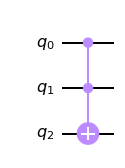

In [21]:
#Basic Toffoli gate
qc = QuantumCircuit(3)
qc.ccx(0,1,2)
qc.draw()

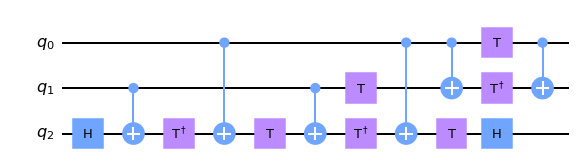

In [22]:
qc_decomposed = qc.decompose()
qc_decomposed.draw()

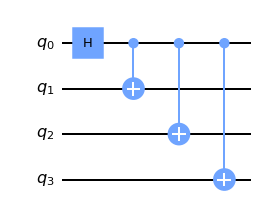

In [23]:
#Basic circuit with a single and multi-qubit gates
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(0,3)
qc.draw()

In [24]:
print('Initial circuit depth: ', qc.depth())
print('Decomposed circuit depth: ', qc_decomposed.depth())
print('Initial circuit operation count: ', qc.count_ops())

Initial circuit depth:  4
Decomposed circuit depth:  11
Initial circuit operation count:  OrderedDict([('cx', 3), ('h', 1)])


In [25]:
backend_santiago = provider.get_backend('ibmq_santiago')
backend_santiago

<IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>

In [27]:
backend_melbourne = provider.get_backend('ibmq_16_melbourne')
backend_melbourne

<IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>

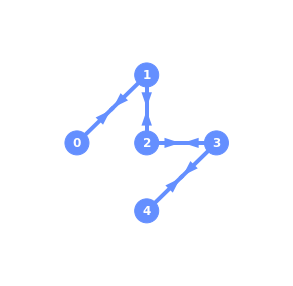

In [28]:
plot_gate_map(backend_santiago, plot_directed=True)

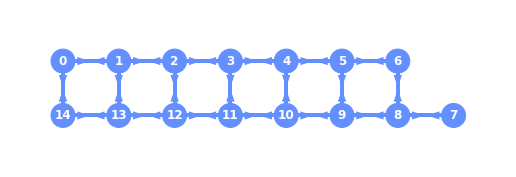

In [30]:
plot_gate_map(backend_melbourne, plot_directed=True)

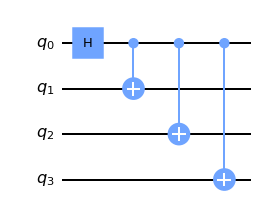

In [31]:
# Quantum circuit with single and multi-qubit gates
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(0,3)
qc.draw()

Depth: 10


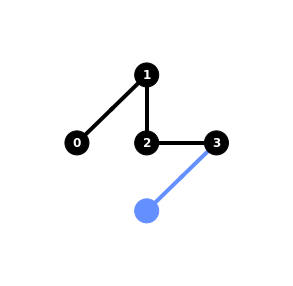

In [33]:
# Transpile the circuit with an optimization level = 0
qc_santiago_0 = transpile(qc, backend_santiago, seed_transpiler=10258, optimization_level=0)
# Print out the depth of circuit
print('Depth:', qc_santiago_0.depth())
plot_circuit_layout(qc_santiago_0, backend_santiago)

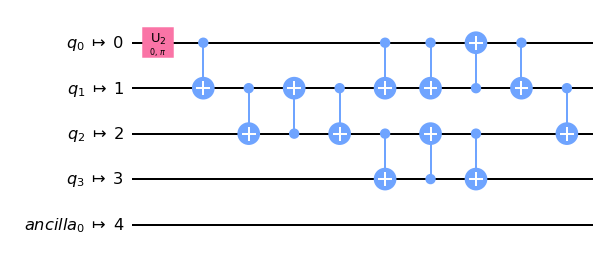

In [34]:
qc_santiago_0.draw()

Depth: 10


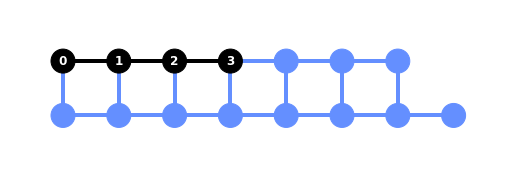

In [36]:
# Transpile the circuit with an optimization level = 0
qc_melbourne_0 = transpile(qc, backend_melbourne, seed_transpiler=10258, optimization_level=0)
# Print out the depth of circuit
print('Depth:', qc_melbourne_0.depth())
plot_circuit_layout(qc_melbourne_0, backend_melbourne)

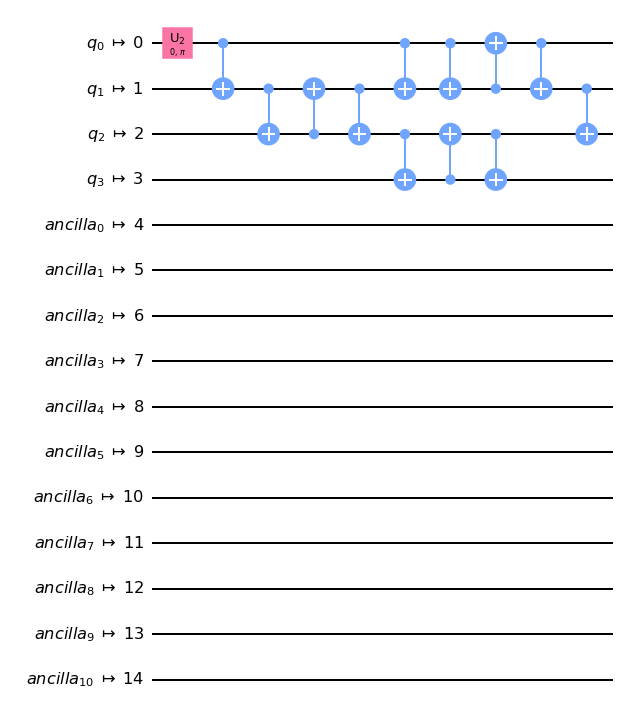

In [37]:
qc_melbourne_0.draw()

Depth:  10
Ops count:  OrderedDict([('u2', 11), ('cx', 5)])


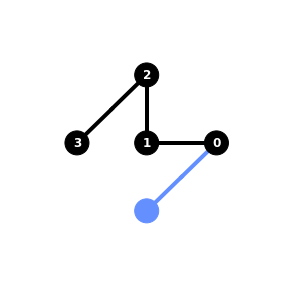

In [38]:
#Transpile circuit with optimization level = 3
qc_transpiled_santiago = transpile(qc, backend_santiago, optimization_level=3)
print('Depth: ', qc_transpiled_santiago.depth())
print('Ops count: ', qc_transpiled_santiago.count_ops())
plot_circuit_layout(qc_transpiled_santiago, backend_santiago)

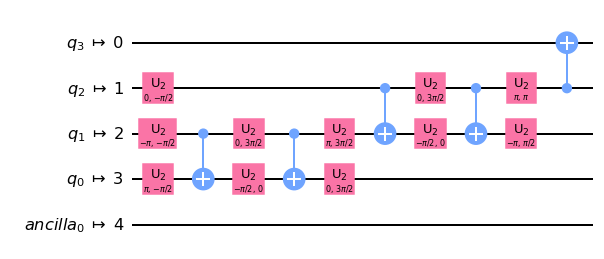

In [39]:
qc_transpiled_santiago.draw()

Depth:  4
Ops count:  OrderedDict([('cx', 3), ('u2', 1)])


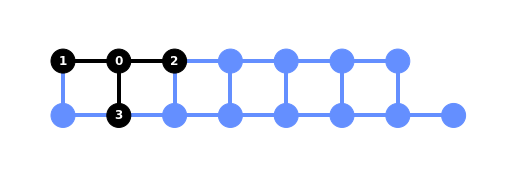

In [40]:
#Transpile circuit with optimization level = 3
qc_transpiled_melbourne = transpile(qc, backend_melbourne, optimization_level=3)
print('Depth: ', qc_transpiled_melbourne.depth())
print('Ops count: ', qc_transpiled_melbourne.count_ops())
plot_circuit_layout(qc_transpiled_melbourne, backend_melbourne)

In [41]:
backend = provider.get_backend('ibmqx2')
backend

<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

IndentationError: unexpected indent (<ipython-input-46-190cca3a0672>, line 3)